# Importing Modules

In [845]:
import pandas as pd, numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
%matplotlib inline

# Read DataSet

In [846]:
#Read the Dataset
df = pd.read_csv('../traineddataUpdate.csv')
df.head()

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand,Price
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,71378.6832
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,47895.5232
2,HP,Notebook,8,Other,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,30636.0000
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,135195.3360
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,96095.8080


In [847]:
df.shape

(1302, 13)

# Data Pre-Processing

## Coverting CPU_name values to Integer values

### 1. Take the First Name of the CPU_name Column

In [848]:
# take the CPU_name column and take only the first String value of each row
cpu_manufact = df['CPU_name'].str.split(' ',n = 1,expand=True)
df['CPU_manufacture'] = cpu_manufact[0]
df.head()

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand,Price,CPU_manufacture
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,71378.6832,Intel
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,47895.5232,Intel
2,HP,Notebook,8,Other,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,30636.0000,Intel
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,135195.3360,Intel
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,96095.8080,Intel


<AxesSubplot:ylabel='None'>

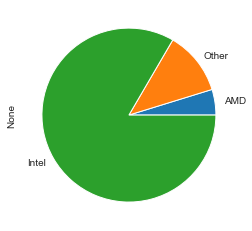

In [849]:
# check whether new column created successfuly from the pie chart
cpu_value = df.value_counts('CPU_manufacture')
cpu_value.sort_values().plot(kind='pie')

### 2. Check values created in new Column

In [850]:
#Create a New Column name CPU manufacture
CPU_manufacture_type = df.value_counts("CPU_manufacture")
print(CPU_manufacture_type)

CPU_manufacture
Intel    1086
Other     154
AMD        62
dtype: int64


In [851]:
labeled_cpu_manufacture = LabelEncoder()
labeled_type = LabelEncoder()

### 3. Replace the values in CPU_manufacture column to 0,1,2 values

In [852]:
#Replace the values in CPU_manufacture column to 0,1,2

df['CPU_manufacture_type'] = labeled_cpu_manufacture.fit_transform(df['CPU_manufacture'])
df['Type'] = labeled_cpu_manufacture.fit_transform(df['TypeName'])

df.head()
# def type_convert_numeric():
#     df['Type'] = np.select(
#         condlist=[
#             df['TypeName'] == "Notebook",
#             df['TypeName'] == "Gaming",
#             df['TypeName'] == "Ultrabook",
#             df['TypeName'] == "2 in 1 Convertible",
#             df['TypeName'] == "Workstation",
#             df['TypeName'] == "Netbook",
#         ],
#         choicelist=[
#             0,
#             1,
#             2,
#             3,
#             4,
#             5
#         ],
#         default=0
#     )
#
# listTypes = ["Notebook", "Gaming", "Ultrabook", "2 in 1 Convertible", "Workstation", "Netbook"]
# for value in listTypes:
#     type_convert_numeric()
#
# df.head()

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand,Price,CPU_manufacture,CPU_manufacture_type,Type,Company_Type
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,71378.6832,Intel,1,4,1
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,47895.5232,Intel,1,4,1
2,HP,Notebook,8,Other,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,30636.0000,Intel,1,3,7
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,135195.3360,Intel,1,4,1
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,96095.8080,Intel,1,4,1


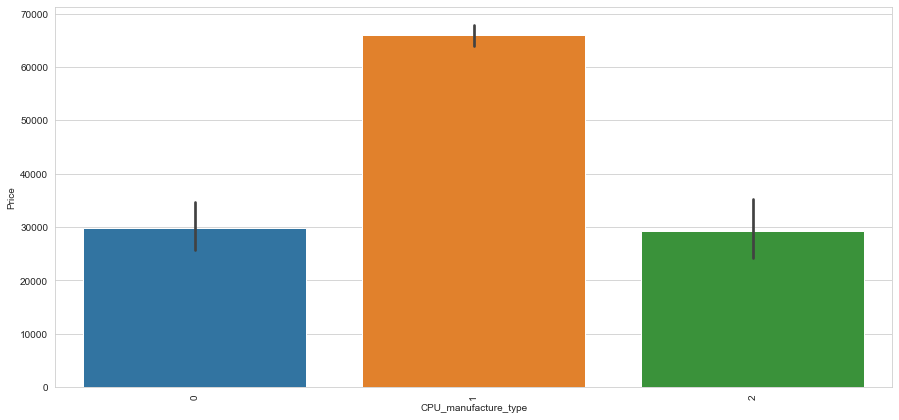

In [853]:
plt.figure(figsize=(15,7))
sn.barplot(x = df['CPU_manufacture_type'],y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

## Converting TypeName values to Integer values

### Same Process as CPU_name follows

In [854]:
notebook_type = df.value_counts("TypeName")
print(notebook_type)

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    120
Workstation            29
Netbook                25
dtype: int64


In [855]:
company = df.value_counts("Company")
print(company)

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Vero           4
Xiaomi         4
Google         3
Fujitsu        3
Chuwi          3
LG             3
Huawei         2
dtype: int64


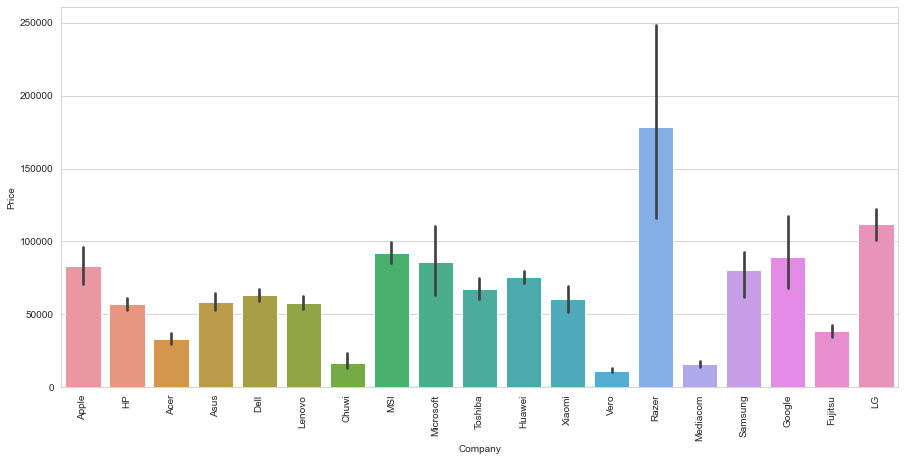

In [856]:
plt.figure(figsize=(15,7))
sn.barplot(x = df['Company'],y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [856]:
def type_convert_numeric3():
    df['Company_Type'] = np.select(
        condlist=[
            df['Company']  == "Dell",
            df['Company'] == "Lenovo",
            df['Company']  == "HP",
            df['Company']  == "Asus",
            df['Company']  == "Acer",
            df['Company']  == "MSI",
            df['Company']  == "Toshiba",
            df['Company']  == "Apple",
            df['Company']  == "Samsung",
            df['Company']  == "Razer",
            df['Company']  == "Mediacom",
            df['Company']  ==  "Microsoft",
            df['Company']  == "Vero",
            df['Company']  ==  "Xiaomi",
            df['Company']  ==  "Google",
            df['Company']  ==  "Fujitsu",
            df['Company']  ==  "Chuwi",
            df['Company']  ==  "LG",
            df['Company']  ==  "Huawei",
        ],
        choicelist=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],
        default=0
    )


listTypes = ["Dell", "Lenovo", "HP", "Asus", "Acer", "MSI", "Toshiba", "Apple", "Samsung", "Razer", "Mediacom", "Microsoft", "Vero", "Xiaomi","Google", "Fujitsu", "Chuwi", "LG","Huawei"]

for value in listTypes:
    type_convert_numeric3()

df.head()

# Check whether there's null rows

In [857]:
df.isnull().sum().sum()

0

<AxesSubplot:xlabel='Price', ylabel='Count'>

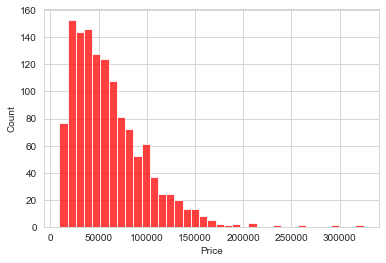

In [858]:
sn.histplot(df['Price'],color='red')

# Vizualize data

## Define X and Y cordinates

In [859]:

#x = df.drop(['Price', 'Company', 'TypeName', 'OpSys', 'CPU_name', 'CPU_manufacture', 'Gpu brand'], axis=1)
#x = np.log(df.drop(['Price', 'Company', 'TypeName', 'OpSys', 'CPU_name', 'CPU_manufacture', 'Gpu brand'], axis=1))

x = df.drop(['Price'], axis=1)
#y = df['Price']
y = np.log(df['Price'])



In [860]:
x

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand,CPU_manufacture,CPU_manufacture_type,Type,Company_Type
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Intel,1,4,1
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Intel,1,4,1
2,HP,Notebook,8,Other,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Intel,1,3,7
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Intel,1,4,1
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Intel,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Lenovo,2 in 1 Convertible,4,Windows,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Intel,1,0,10
1298,Lenovo,2 in 1 Convertible,16,Windows,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Intel,1,0,10
1299,Lenovo,Notebook,2,Windows,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Other,2,3,10
1300,HP,Notebook,6,Windows,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Intel,1,3,7


In [861]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=2)
X_train.shape,X_test.shape

((1106, 16), (196, 16))

In [862]:
mapper = {i:value for i,value in enumerate(X_train.columns)}
mapper

{0: 'Company',
 1: 'TypeName',
 2: 'Ram',
 3: 'OpSys',
 4: 'Weight',
 5: 'TouchScreen',
 6: 'IPS',
 7: 'PPI',
 8: 'CPU_name',
 9: 'HDD',
 10: 'SSD',
 11: 'Gpu brand',
 12: 'CPU_manufacture',
 13: 'CPU_manufacture_type',
 14: 'Type',
 15: 'Company_Type'}

In [863]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11,12,15])
],remainder='passthrough')



step2 = RandomForestRegressor(
                            n_estimators=1000,
                              random_state=2,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=100
)


pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
print(y_pred)




[10.73052759  9.74030255  9.75056858 10.1765399  11.2197685  11.49127535
 10.09959553 10.60156226 11.09706678  9.74761589 11.13566064 10.84036802
 11.53940539 10.87830296 11.51825387 11.04686244 11.01203088  9.7578228
 11.49321441 11.50204779 11.40941753 11.27284069 10.57668748 11.02709521
 10.30341866 11.51139839 10.94596009 10.03090156 10.96029272 10.50184744
 11.18098435  9.97634457 10.76266739 10.89950357 11.01230992 10.74251171
 11.13523725 11.1634096  11.49425567 11.39650282 11.52774068 11.17906941
  9.8581077   9.74982425 10.11953959  9.921759   10.8119988  11.55106724
 11.3674084  11.10073316 11.68675118 11.52321184  9.9392563   9.47425853
 10.43189561 10.8196461   9.95987694 11.17196783 10.07723329 10.4909962
 11.04709585 10.99612404  9.47983754 11.26390054 10.99462045 10.57407042
 10.058198   11.20566897 10.68135179  9.80115628 10.97990264 10.56498222
 10.63865282 10.49306404 11.18084728 10.87198036 11.28051139 11.95164438
 11.26787122 10.53488724 10.79686186 11.07738212 11.4

In [864]:
print('R2 score',metrics.r2_score(y_test,y_pred))

R2 score 0.8946505774291363


# Confusion Matrix

In [865]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
# class_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine',
#                'Cottonwood/Willow', 'Aspen', 'Douglas-fir',
#                'Krummholz']
# tick_marks = np.arange(len(class_names))
# tick_marks2 = tick_marks + 0.5
# plt.xticks(tick_marks, class_names, rotation=25)
# plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

ValueError: continuous is not supported

# Main Points to Concern

In [ ]:
#when adding np.log accuracy increased from 0.817992766637844 to 0.8872578010268356


# Description

## 1

When dropping columns with df.drop
without pipeline accuracy - 0.7668858153216616
with pipeline - 0.7668858153216616

So with pipeline noting specially happens

## 2

When using np.log for testing dataset with dropping columns with df.drop in training

Previous - 0.7668858153216616
with/without pipeline - 0.8200408569709455

So np.log significant change happens

Special thing here is if we use np.log to training dataset error occur with Input contains NaN, infinity or a value too large for dtype('float32').

## 3

When dropping type column

Previous (without dropping) - 0.8200408569709455
now - 0.7883011987665366
and with adding CPU_manufacture_type accuracy increased from 0.8200 to 0.8507

So with having type and CPU_manufacture_type column significant change happens

## 4

when we use df.drop([]) with column drop instead of accuracy dropped ColumnTransformer

Previous - 0.8507952228709466
now - 0.8872182051267166
dropping only CPU_manufacture_type with ColumnTransformer - 0.8875035810985037
dropping only type with ColumnTransformer - 0.8893041991733325
dropping both with ColumnTransformer - 0.8862410001112703


So with having CPU_manufacture_type column high accuracy can be gain

## 5

when test size is 0.3 accurcy is 0.8691216458540366, 0.15 - 0.8893041991733325, 0.1 - 0.8824622418662149

So with having 0.15 testing size high accuracy can be gain

## 6

when test size is 0.3 accurcy is 0.8691216458540366, 0.15 - 0.8893041991733325, 0.1 - 0.8824622418662149


So with having 0.15 testing size high accuracy can be gain
And with having random stae = 2 high accuracy is there 0.8893041991733325

## 7

when RandomRegressor
n_estimators = 1000 accuracy - 0.8907109890050905
100 = acc - 0.8893041991733325


But when increasing more than 1000 noting spcially happens to accuracy

## 8

when RandomRegressor with n_estimators = 1000

random size = 1 - accuracy - 0.8911787220521755
random size = 42 - accuracy - 0.8907109890050905
random size = 2 - accuracy - 0.8911842454947371

highest accuracy is with random size = 2

## 9

n_estimators=1000,
random_state=2,
max_samples=0.5,
max_features=0.75,
max_depth=100

with accuracy 0.891968 can be gain

In [ ]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
# class_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine',
#                'Cottonwood/Willow', 'Aspen', 'Douglas-fir',
#                'Krummholz']
# tick_marks = np.arange(len(class_names))
# tick_marks2 = tick_marks + 0.5
# plt.xticks(tick_marks, class_names, rotation=25)
# plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

# Main Points to Concern

In [ ]:
#when adding np.log accuracy increased from 0.817992766637844 to 0.8872578010268356


# Description

## 1

When dropping columns with df.drop
without pipeline accuracy - 0.7668858153216616
with pipeline - 0.7668858153216616

So with pipeline noting specially happens

## 2

When using np.log for testing dataset with dropping columns with df.drop in training

Previous - 0.7668858153216616
with/without pipeline - 0.8200408569709455

So np.log significant change happens

Special thing here is if we use np.log to training dataset error occur with Input contains NaN, infinity or a value too large for dtype('float32').

## 3

When dropping type column

Previous (without dropping) - 0.8200408569709455
now - 0.7883011987665366
and with adding CPU_manufacture_type accuracy increased from 0.8200 to 0.8507

So with having type and CPU_manufacture_type column significant change happens

## 4

when we use df.drop([]) with column drop instead of accuracy dropped ColumnTransformer

Previous - 0.8507952228709466
now - 0.8872182051267166
dropping only CPU_manufacture_type with ColumnTransformer - 0.8875035810985037
dropping only type with ColumnTransformer - 0.8893041991733325
dropping both with ColumnTransformer - 0.8862410001112703


So with having CPU_manufacture_type column high accuracy can be gain

## 5

when test size is 0.3 accurcy is 0.8691216458540366, 0.15 - 0.8893041991733325, 0.1 - 0.8824622418662149

So with having 0.15 testing size high accuracy can be gain

## 6

when test size is 0.3 accurcy is 0.8691216458540366, 0.15 - 0.8893041991733325, 0.1 - 0.8824622418662149


So with having 0.15 testing size high accuracy can be gain
And with having random stae = 2 high accuracy is there 0.8893041991733325

## 7

when RandomRegressor
n_estimators = 1000 accuracy - 0.8907109890050905
100 = acc - 0.8893041991733325


But when increasing more than 1000 noting spcially happens to accuracy

## 8

when RandomRegressor with n_estimators = 1000

random size = 1 - accuracy - 0.8911787220521755
random size = 42 - accuracy - 0.8907109890050905
random size = 2 - accuracy - 0.8911842454947371

highest accuracy is with random size = 2

## 9

n_estimators=1000,
random_state=2,
max_samples=0.5,
max_features=0.75,
max_depth=100

with accuracy 0.891968 can be gain

In [ ]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
# class_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine',
#                'Cottonwood/Willow', 'Aspen', 'Douglas-fir',
#                'Krummholz']
# tick_marks = np.arange(len(class_names))
# tick_marks2 = tick_marks + 0.5
# plt.xticks(tick_marks, class_names, rotation=25)
# plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

# Main Points to Concern

In [ ]:
#when adding np.log accuracy increased from 0.817992766637844 to 0.8872578010268356


# Description

## 1

When dropping columns with df.drop
without pipeline accuracy - 0.7668858153216616
with pipeline - 0.7668858153216616

So with pipeline noting specially happens

## 2

When using np.log for testing dataset with dropping columns with df.drop in training

Previous - 0.7668858153216616
with/without pipeline - 0.8200408569709455

So np.log significant change happens

Special thing here is if we use np.log to training dataset error occur with Input contains NaN, infinity or a value too large for dtype('float32').

## 3

When dropping type column

Previous (without dropping) - 0.8200408569709455
now - 0.7883011987665366
and with adding CPU_manufacture_type accuracy increased from 0.8200 to 0.8507

So with having type and CPU_manufacture_type column significant change happens

## 4

when we use df.drop([]) with column drop instead of accuracy dropped ColumnTransformer

Previous - 0.8507952228709466
now - 0.8872182051267166
dropping only CPU_manufacture_type with ColumnTransformer - 0.8875035810985037
dropping only type with ColumnTransformer - 0.8893041991733325
dropping both with ColumnTransformer - 0.8862410001112703


So with having CPU_manufacture_type column high accuracy can be gain

## 5

when test size is 0.3 accurcy is 0.8691216458540366, 0.15 - 0.8893041991733325, 0.1 - 0.8824622418662149

So with having 0.15 testing size high accuracy can be gain

## 6

when test size is 0.3 accurcy is 0.8691216458540366, 0.15 - 0.8893041991733325, 0.1 - 0.8824622418662149


So with having 0.15 testing size high accuracy can be gain
And with having random stae = 2 high accuracy is there 0.8893041991733325

## 7

when RandomRegressor
n_estimators = 1000 accuracy - 0.8907109890050905
100 = acc - 0.8893041991733325


But when increasing more than 1000 noting spcially happens to accuracy

## 8

when RandomRegressor with n_estimators = 1000

random size = 1 - accuracy - 0.8911787220521755
random size = 42 - accuracy - 0.8907109890050905
random size = 2 - accuracy - 0.8911842454947371

highest accuracy is with random size = 2

## 9

n_estimators=1000,
random_state=2,
max_samples=0.5,
max_features=0.75,
max_depth=100

with accuracy 0.891968 can be gain